In [1]:
import numpy as np 

from cleanplots import * 

In [2]:
psf_names = ['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
psf_names_nice = ['One Lenslet', 'Two Lenslet', 'Three Lenslet', 'Four Lenslet', 'Five Lenslet', 'Six Lenslet', 'Seven Lenslet', 'Eight Lenslet', 'Nine Lenslet']

# set eligible bead sparsity levels
sparsity_levels = [0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.02, 0.025, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 
                   0.16, 0.17, 0.18, 0.19, 0.20, 0.21, 0.22, 0.23, 0.24, 0.25, 0.30, 0.35, 0.40, 0.45, 0.5]

# set dataset size 
num_x = 96
num_y = 96
num_bead_imgs = 50000
patch_size = 32
num_patches = 10000
val_set_size = 1000
test_set_size = 1500
num_samples = 8
learning_rate = 1e-3
num_iters_per_epoch = 500
patience_val = 20
max_photon_count = 1000

In [3]:
figure_dir = '/home/lakabuli/workspace/LenslessInfoDesign/figures/'

### Load Object TCs

In [4]:
tc_dir = '/home/lakabuli/workspace/LenslessInfoDesign/tradeoff_analysis/tc_values/bead_per_max_tc_values/'

{'full': [np.float32(1.3588215), np.float32(0.016813617)], 'crop': [np.float32(1.3685265), np.float32(0.13535927)]}
{'full': [np.float32(1.3179525), np.float32(0.016410327)], 'crop': [np.float32(1.3239619), np.float32(0.12261662)]}
{'full': [np.float32(1.278587), np.float32(0.01606197)], 'crop': [np.float32(1.2817489), np.float32(0.111764856)]}
{'full': [np.float32(1.2475109), np.float32(0.015788851)], 'crop': [np.float32(1.2486829), np.float32(0.104013875)]}
{'full': [np.float32(1.2196074), np.float32(0.015450943)], 'crop': [np.float32(1.2193334), np.float32(0.09765958)]}
{'full': [np.float32(1.1944333), np.float32(0.015201833)], 'crop': [np.float32(1.1928513), np.float32(0.092288256)]}
{'full': [np.float32(1.1691554), np.float32(0.014943332)], 'crop': [np.float32(1.1667233), np.float32(0.087159514)]}
{'full': [np.float32(1.1484342), np.float32(0.0147269275)], 'crop': [np.float32(1.1453289), np.float32(0.083182015)]}
{'full': [np.float32(1.0641085), np.float32(0.013903436)], 'crop': [

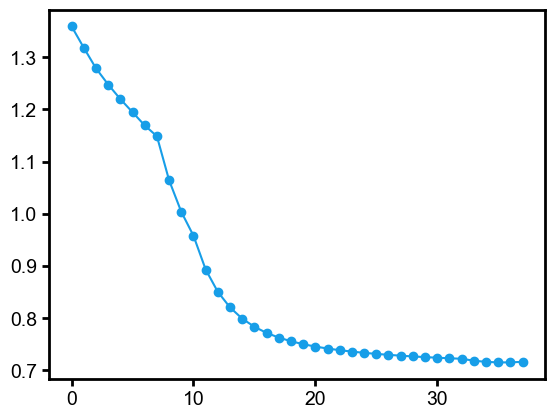

In [5]:
object_tcs = []
for sparsity in sparsity_levels: 
    object_path = tc_dir + 'tamura_values_object_{}_sparsity_{}_photons.npy'.format(sparsity, max_photon_count)
    object_tc = np.load(object_path, allow_pickle=True).item()
    tamura_value = object_tc['full'][0]
    object_tcs.append(tamura_value)
    print(object_tc)
object_tcs = np.array(object_tcs)
plt.plot(object_tcs, '-o')

In [6]:
print(sparsity_levels)
print(object_tcs)

[0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.02, 0.025, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
[1.3588215  1.3179525  1.278587   1.2475109  1.2196074  1.1944333
 1.1691554  1.1484342  1.0641085  1.003684   0.957902   0.8931782
 0.8503194  0.82055795 0.7990492  0.78345203 0.77175367 0.7628077
 0.7557686  0.7501579  0.74558204 0.7418257  0.7386448  0.7359446
 0.73359483 0.7315514  0.7297516  0.7281418  0.72668374 0.7254043
 0.7242239  0.723174   0.7221991  0.71854526 0.71631885 0.71525943
 0.71527165 0.7163923 ]


### Load Measurement TCs - use noisy patch TC with read noise version

In [7]:
tc_dir = '/home/lakabuli/workspace/LenslessInfoDesign/tradeoff_analysis/tc_values/bead_per_max_tc_values/'

In [8]:
sparsities_and_tcs = []
for sparsity in sparsity_levels:
    tc_across_psfs = [] 
    for psf in psf_names: 
        tc_path = tc_dir + 'tamura_values_{}_sparsity_{}_photons_max_{}_psf.npy'.format(sparsity, max_photon_count, psf)
        tc = np.load(tc_path, allow_pickle=True).item()
        tc_value = tc['patch_noisy'][0] 
        print("TC value for sparsity {} and PSF {} is {}".format(sparsity, psf, tc_value))
        tc_across_psfs.append(tc_value)
    sparsities_and_tcs.append(tc_across_psfs)
sparsities_and_tcs = np.array(sparsities_and_tcs)

TC value for sparsity 0.008 and PSF one is 1.1851528882980347
TC value for sparsity 0.008 and PSF two is 0.991526186466217
TC value for sparsity 0.008 and PSF three is 0.9021708965301514
TC value for sparsity 0.008 and PSF four is 0.8502588868141174
TC value for sparsity 0.008 and PSF five is 0.8182998299598694
TC value for sparsity 0.008 and PSF six is 0.797704815864563
TC value for sparsity 0.008 and PSF seven is 0.7835999131202698
TC value for sparsity 0.008 and PSF eight is 0.7737371325492859
TC value for sparsity 0.008 and PSF nine is 0.7662745714187622
TC value for sparsity 0.009 and PSF one is 1.156921148300171
TC value for sparsity 0.009 and PSF two is 0.969311535358429
TC value for sparsity 0.009 and PSF three is 0.8841433525085449
TC value for sparsity 0.009 and PSF four is 0.8362038135528564
TC value for sparsity 0.009 and PSF five is 0.8071979284286499
TC value for sparsity 0.009 and PSF six is 0.7889875769615173
TC value for sparsity 0.009 and PSF seven is 0.77651417255401

### Load MI sweeps

In [9]:
mi_dir = '/home/lakabuli/workspace/LenslessInfoDesign/tradeoff_analysis/mi_estimates/bead_per_max_mi_estimates/'

In [10]:
sparsities_and_mis = []
sparsities_and_lowers = []
sparsities_and_uppers = []
for sparsity in sparsity_levels:
    mi_across_psfs = []
    lowers_across_psfs = []
    uppers_across_psfs = []
    for psf in psf_names:
        mi_path = mi_dir + 'pixelcnn_mi_estimate_{}_sparsity_{}_photons_{}_psf_{}_lr_{}_patience_{}_steps_per_epoch.npy'.format(sparsity, max_photon_count, psf, learning_rate, patience_val, num_iters_per_epoch)
        mi_estimates = np.load(mi_path)
        print('MI estimate for sparsity level {} and PSF {} is {}'.format(sparsity, psf, mi_estimates))
        best_mi_value, best_mi_idx = np.min(mi_estimates[0]), np.argmin(mi_estimates[0])
        best_mi_lower_bound = mi_estimates[1][best_mi_idx]
        best_mi_upper_bound = mi_estimates[2][best_mi_idx]
        mi_across_psfs.append(best_mi_value)
        lowers_across_psfs.append(best_mi_lower_bound)
        uppers_across_psfs.append(best_mi_upper_bound)
    sparsities_and_mis.append(mi_across_psfs)
    sparsities_and_lowers.append(lowers_across_psfs)
    sparsities_and_uppers.append(uppers_across_psfs)
sparsities_and_mis = np.array(sparsities_and_mis)
sparsities_and_lowers = np.array(sparsities_and_lowers)
sparsities_and_uppers = np.array(sparsities_and_uppers)

MI estimate for sparsity level 0.008 and PSF one is [[0.10685512 0.1028395 ]
 [0.10041915 0.09682712]
 [0.11304423 0.10913743]]
MI estimate for sparsity level 0.008 and PSF two is [[0.15207184 0.14913418]
 [0.14495171 0.14196581]
 [0.15933086 0.1561363 ]]
MI estimate for sparsity level 0.008 and PSF three is [[0.18826058 0.1825512 ]
 [0.18154072 0.17585885]
 [0.19593906 0.18955853]]
MI estimate for sparsity level 0.008 and PSF four is [[0.24115791 0.23783192]
 [0.23283082 0.23061942]
 [0.24895066 0.24539917]]
MI estimate for sparsity level 0.008 and PSF five is [[0.27590922 0.27323004]
 [0.26849367 0.26587223]
 [0.28367646 0.2810166 ]]
MI estimate for sparsity level 0.008 and PSF six is [[0.29493002 0.28992697]
 [0.28801553 0.28266297]
 [0.3025236  0.29756138]]
MI estimate for sparsity level 0.008 and PSF seven is [[0.30427113 0.30070592]
 [0.29737207 0.29334199]
 [0.31161996 0.3081477 ]]
MI estimate for sparsity level 0.008 and PSF eight is [[0.3104761  0.30710445]
 [0.30352856 0.3000

MI estimate for sparsity level 0.015 and PSF two is [[0.26717524 0.27202329]
 [0.25926289 0.26312894]
 [0.27638447 0.2806106 ]]
MI estimate for sparsity level 0.015 and PSF three is [[0.32793248 0.32862368]
 [0.3207469  0.32065148]
 [0.33666358 0.33677869]]
MI estimate for sparsity level 0.015 and PSF four is [[0.39313032 0.39612992]
 [0.38657139 0.38835916]
 [0.40139391 0.40442266]]
MI estimate for sparsity level 0.015 and PSF five is [[0.41739263 0.41964749]
 [0.41127253 0.41237051]
 [0.42433993 0.42668912]]
MI estimate for sparsity level 0.015 and PSF six is [[0.41628688 0.41836132]
 [0.41060008 0.41159439]
 [0.42227182 0.42534656]]
MI estimate for sparsity level 0.015 and PSF seven is [[0.40633521 0.40758795]
 [0.40079335 0.40101322]
 [0.4123255  0.41437252]]
MI estimate for sparsity level 0.015 and PSF eight is [[0.39704542 0.39860602]
 [0.3915602  0.39220936]
 [0.40288532 0.40479151]]
MI estimate for sparsity level 0.015 and PSF nine is [[0.38184679 0.38388376]
 [0.377037   0.377

## Plot MI vs Object Sparsity: Fig. S5b

In [11]:
sparsities_and_mis.shape

(38, 9)

### Figure with perceptual colormap

In [12]:
inferno = plt.cm.get_cmap('inferno', 11) # max photon count value, using each tick point smoothly gives a better color gradient that isn't uniform
colors = [inferno(i) for i in [1, 2, 3, 4, 5, 6, 7, 8, 9]]

axis_label_fontsize = 21
title_fontsize = 23
tick_fontsize = 19
legend_fontsize = 16
star_size = 18
error_bar_transparency = 0.15

/tmp/ipykernel_3836669/2299809711.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  inferno = plt.cm.get_cmap('inferno', 11) # max photon count value, using each tick point smoothly gives a better color gradient that isn't uniform


Sensor sparsity for PSF One Lenslet is 0.7285807132720947 and MI is 0.8509198052637036
Sensor sparsity for PSF Two Lenslet is 0.7318904995918274 and MI is 0.6927267230034767
Sensor sparsity for PSF Three Lenslet is 0.7318316698074341 and MI is 0.618320279846668
Sensor sparsity for PSF Four Lenslet is 0.7301926016807556 and MI is 0.573514307231339
Sensor sparsity for PSF Five Lenslet is 0.7295128703117371 and MI is 0.5350958431286509
Sensor sparsity for PSF Six Lenslet is 0.7285841107368469 and MI is 0.5030909074537466
Sensor sparsity for PSF Seven Lenslet is 0.7278649210929871 and MI is 0.47533694807164634
Sensor sparsity for PSF Eight Lenslet is 0.7279267311096191 and MI is 0.45562556500454987
Sensor sparsity for PSF Nine Lenslet is 0.7270084023475647 and MI is 0.43302963242559656


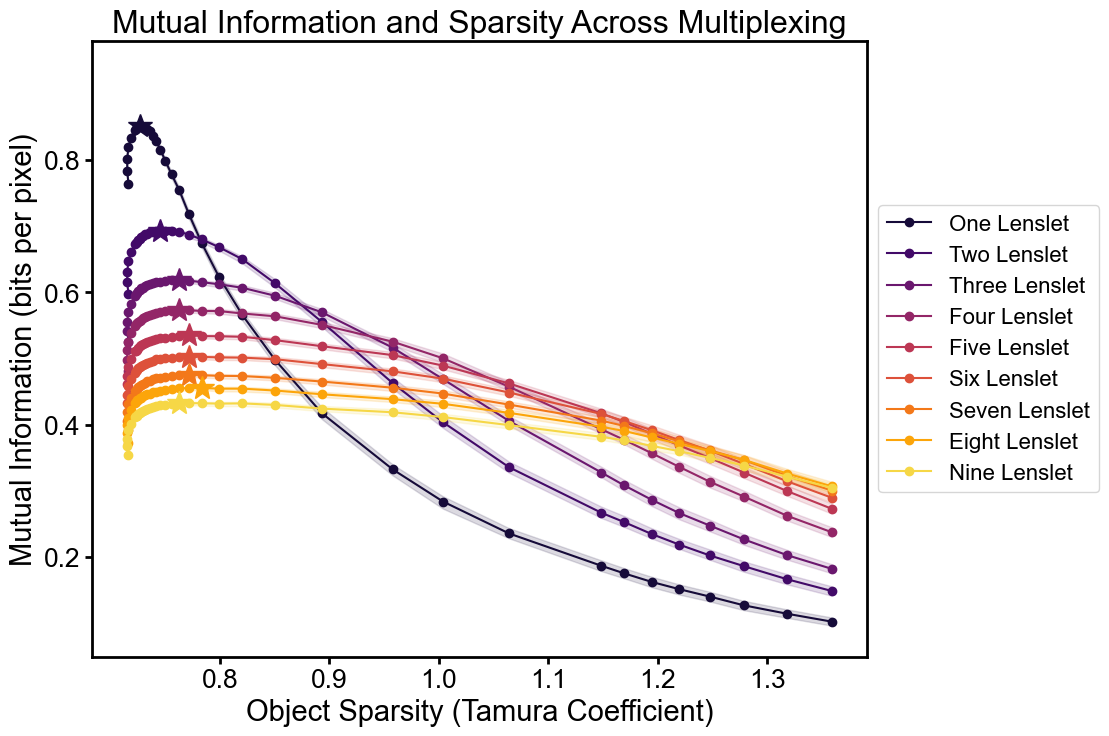

In [13]:
plt.figure(figsize=(10, 8))
for psf_idx in range(9):
    plt.plot(object_tcs, sparsities_and_mis[:, psf_idx], '-o', label=psf_names_nice[psf_idx], color=colors[psf_idx])
    plt.fill_between(object_tcs, sparsities_and_lowers[:, psf_idx], sparsities_and_uppers[:, psf_idx], alpha=error_bar_transparency, color=colors[psf_idx])
    y_coord_idx = np.argmax(sparsities_and_mis[:, psf_idx])
    y_coord = sparsities_and_mis[y_coord_idx, psf_idx]
    x_coord = object_tcs[y_coord_idx]
    plt.plot(x_coord, y_coord, '*', color=colors[psf_idx], markersize=star_size)
    print("Sensor sparsity for PSF {} is {} and MI is {}".format(psf_names_nice[psf_idx], sparsities_and_tcs[y_coord_idx, psf_idx], y_coord))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=legend_fontsize)
plt.xlabel('Object Sparsity (Tamura Coefficient)', fontsize=axis_label_fontsize)
plt.ylabel('Mutual Information (bits per pixel)', fontsize=axis_label_fontsize)
plt.ylim([0.05, 0.98])
#plt.xlim([0.65, 1.39])
plt.xticks([0.8, 0.9, 1.0, 1.1, 1.2, 1.3], size=tick_fontsize)
plt.yticks(fontsize=tick_fontsize)
plt.title("Mutual Information and Sparsity Across Multiplexing", size=title_fontsize)
plt.savefig(figure_dir + 'mi_vs_sparsity_2D_max_bead_norm.pdf', transparent=True, bbox_inches='tight')

## Plot of Object Sparsity vs. Measurement TC: Fig. S5c

Sensor sparsity for PSF One Lenslet is 0.7285807132720947 and MI is 0.8509198052637036
Sensor sparsity for PSF Two Lenslet is 0.7318904995918274 and MI is 0.6927267230034767
Sensor sparsity for PSF Three Lenslet is 0.7318316698074341 and MI is 0.618320279846668
Sensor sparsity for PSF Four Lenslet is 0.7301926016807556 and MI is 0.573514307231339
Sensor sparsity for PSF Five Lenslet is 0.7295128703117371 and MI is 0.5350958431286509
Sensor sparsity for PSF Six Lenslet is 0.7285841107368469 and MI is 0.5030909074537466
Sensor sparsity for PSF Seven Lenslet is 0.7278649210929871 and MI is 0.47533694807164634
Sensor sparsity for PSF Eight Lenslet is 0.7279267311096191 and MI is 0.45562556500454987
Sensor sparsity for PSF Nine Lenslet is 0.7270084023475647 and MI is 0.43302963242559656


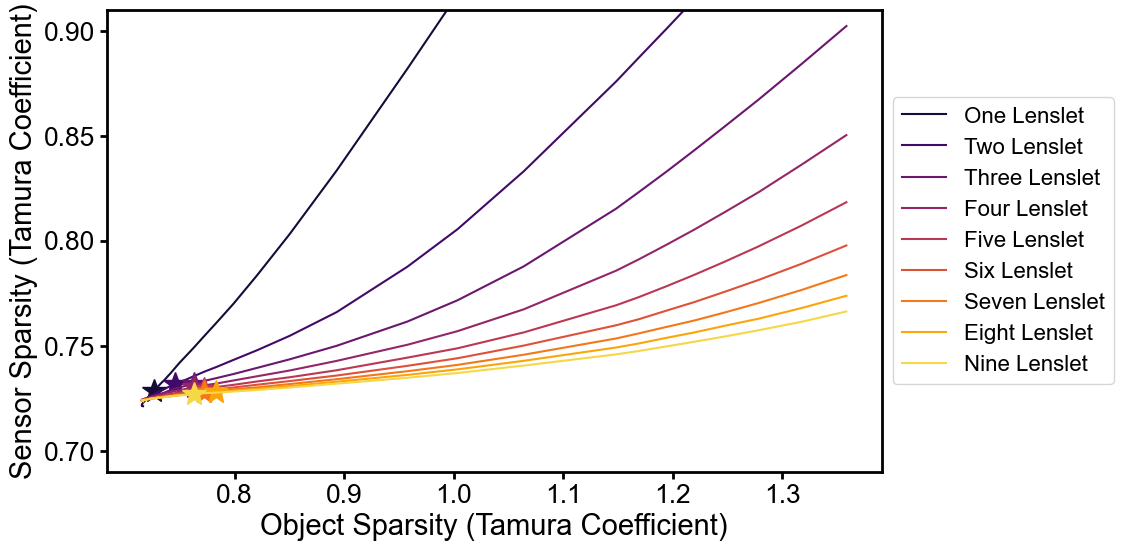

In [14]:
plt.figure(figsize=(10, 6))
# plot in terms of tamura 
for psf_idx in range(9):
    plt.plot(object_tcs, sparsities_and_tcs[:, psf_idx], label=psf_names_nice[psf_idx], color=colors[psf_idx])
    y_coord_idx = np.argmax(sparsities_and_mis[:, psf_idx])
    y_coord = sparsities_and_tcs[y_coord_idx, psf_idx]
    x_coord = object_tcs[y_coord_idx]
    plt.plot(x_coord, y_coord, '*', color=colors[psf_idx], markersize=star_size)
    print("Sensor sparsity for PSF {} is {} and MI is {}".format(psf_names_nice[psf_idx], y_coord, sparsities_and_mis[y_coord_idx, psf_idx]))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=legend_fontsize)
plt.xlabel('Object Sparsity (Tamura Coefficient)', fontsize=axis_label_fontsize)
plt.ylabel('Sensor Sparsity (Tamura Coefficient)', fontsize=axis_label_fontsize)
plt.xticks(fontsize=tick_fontsize)
plt.yticks(fontsize=tick_fontsize)
plt.ylim([0.69, 0.91])
plt.yticks([0.7, 0.75, 0.8, 0.85, 0.9],size=tick_fontsize)
plt.xticks([0.8, 0.9, 1.0, 1.1, 1.2, 1.3], size=tick_fontsize)
plt.savefig(figure_dir + 'sensor_vs_object_sparsity_2D_max_bead_norm.pdf', transparent=True, bbox_inches='tight')

## Make measurement examples: Fig. S5d

In [15]:
import sys
sys.path.append('/home/lakabuli/workspace/LenslessInfoDesign/EncodingInformation/src')
sys.path.append('/home/lakabuli/workspace/LenslessInfoDesign/EncodingInformation/lensless_imager')
from lensless_helpers import *
from encoding_information.image_utils import add_noise


2025-12-23 18:22:59.303156: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1766542979.320658 3836669 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1766542979.326357 3836669 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Sensor sparsity for PSF One Lenslet is 0.7285807132720947 and MI is 0.8509198052637036
Object TC for PSF One Lenslet is 0.7266837358474731, sparsity level 0.21
Sensor sparsity for PSF Four Lenslet is 0.7301926016807556 and MI is 0.573514307231339
Object TC for PSF Four Lenslet is 0.7628077268600464, sparsity level 0.1
Sensor sparsity for PSF Eight Lenslet is 0.7279267311096191 and MI is 0.45562556500454987
Object TC for PSF Eight Lenslet is 0.783452033996582, sparsity level 0.08


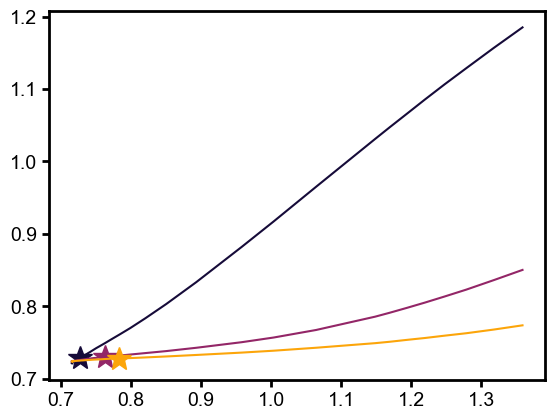

In [16]:
# set each of the ones manually: 
# one lens, four lens, and eight lenslet

psf_indices = [0, 3, 7] 
for psf_idx in psf_indices:
    plt.plot(object_tcs, sparsities_and_tcs[:, psf_idx], label=psf_names_nice[psf_idx], color=colors[psf_idx])
    y_coord_idx = np.argmax(sparsities_and_mis[:, psf_idx])
    y_coord = sparsities_and_tcs[y_coord_idx, psf_idx]
    x_coord = object_tcs[y_coord_idx]
    plt.plot(x_coord, y_coord, '*', color=colors[psf_idx], markersize=star_size)
    print("Sensor sparsity for PSF {} is {} and MI is {}".format(psf_names_nice[psf_idx], y_coord, sparsities_and_mis[y_coord_idx, psf_idx]))
    print("Object TC for PSF {} is {}, sparsity level {}".format(psf_names_nice[psf_idx], object_tcs[y_coord_idx], sparsity_levels[y_coord_idx]))

In [17]:
psfs_to_use = [load_single_lens_uniform(), load_four_lens_uniform(), load_eight_lens_uniform(), load_three_lens_uniform()]
object_sparsities_to_use = [0.21, 0.1, 0.08, 0.02]
these_psf_names = ['one', 'four', 'eight', 'three_nonoptimal']

In [18]:
num_x = 96
num_y = 96
num_bead_imgs = 50
seed_value = 42
bias = 10


Convolving images: 100%|██████████| 50/50 [00:00<00:00, 2706.91image/s]


0.7259091


Convolving images: 100%|██████████| 50/50 [00:00<00:00, 2763.63image/s]

0.7303772



Convolving images: 100%|██████████| 50/50 [00:00<00:00, 1584.00image/s]


0.7435022


Convolving images: 100%|██████████| 50/50 [00:00<00:00, 2728.61image/s]

0.80674887


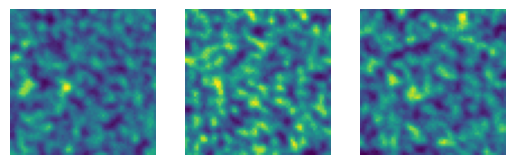

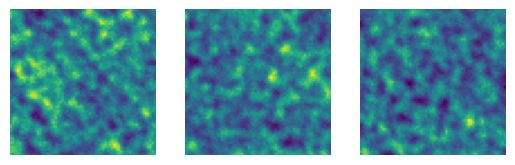

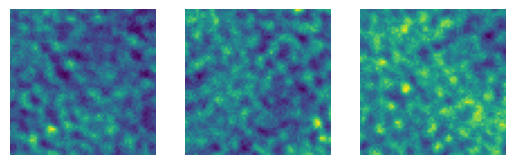

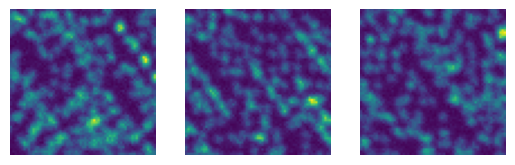

In [19]:
for psf_idx, psf in enumerate(psfs_to_use):
    sparsity = object_sparsities_to_use[psf_idx]
    dataset = np.zeros((num_bead_imgs, num_x, num_y))
    for i in range(dataset.shape[0]):
        dataset[i], num_points = make_bead_volume(sparsity, bead_width_scale=1, numx=num_x, numy=num_y, bead_photon_count=max_photon_count) 
    dataset = dataset.astype(np.float32)
    dataset_photons = dataset
    psf_data = convolved_dataset(psf, dataset_photons)
    psf_data += bias
    psf_data_full_noise = add_noise(psf_data, seed=seed_value)
    print(compute_tamura(psf_data_full_noise[0]))
    
    plt.figure()
    plt.subplot(1, 3, 1)
    plt.imshow(psf_data_full_noise[0]) # no colorbar needed they're all the same
    plt.axis('off')
    plt.subplot(1, 3, 2)
    plt.imshow(psf_data_full_noise[1])
    plt.axis('off')
    plt.subplot(1, 3, 3)
    plt.imshow(psf_data_full_noise[2])
    plt.axis('off')
    plt.savefig(figure_dir + 'max_bead_norm_psf_{}_bead_{}_images.pdf'.format(these_psf_names[psf_idx], sparsity), transparent=True, bbox_inches='tight')

## Make new bead images: Fig. S5a

0.0065646702 1477.4243
0.0 923.9629
0.0 524.0364


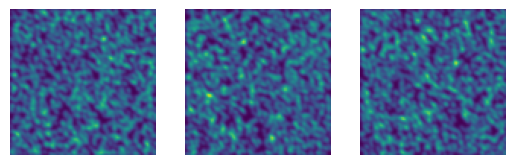

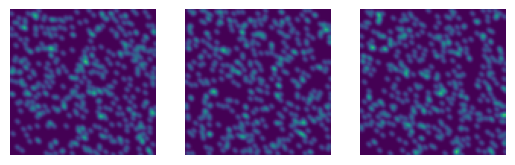

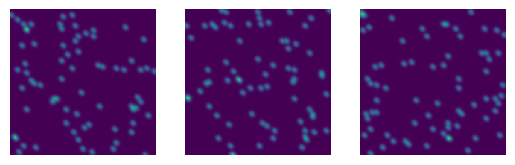

In [20]:
target_sparsities = [0.21, 0.05, 0.008]
for sparsity in target_sparsities:
    dataset = np.zeros((num_bead_imgs, num_x, num_y))
    for i in range(dataset.shape[0]):
        dataset[i], num_points = make_bead_volume(sparsity, bead_width_scale=1, numx=num_x, numy=num_y, bead_photon_count=max_photon_count)
    dataset = dataset.astype(np.float32)
    dataset_photons = dataset
    max_val = np.max(dataset_photons)
    min_val = np.min(dataset_photons)
    print(min_val, max_val)
    # put examples and show images 
    plt.figure()
    plt.subplot(1, 3, 1)
    plt.imshow(dataset_photons[0], vmin=min_val, vmax=max_val)
    plt.axis('off')
    plt.subplot(1, 3, 2)
    plt.imshow(dataset_photons[1], vmin=min_val, vmax=max_val)
    plt.axis('off')
    plt.subplot(1, 3, 3)
    plt.imshow(dataset_photons[2], vmin=min_val, vmax=max_val)
    plt.axis('off')
    plt.savefig(figure_dir + 'max_bead_norm_{}_sparsity_bead_images.pdf'.format(sparsity), transparent=True, bbox_inches='tight')
    